In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    return -1*np.matmul(A,psi)

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]], [x[0], 0]] #-5, -5
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, x[1]], [x[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 3, t0 = 0, p = 0)
    O = [[Result3[0][2]],[Result3[1][2]]]
    
    H1 = [[0, x[2]], [x[2], 0]]
    Result4 = rungeKutta(M, h, somar(H,H1), t = 4, t0 = 0, p = 0)
    O = [[Result4[0][3]],[Result4[1][3]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    X[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+3)/100)
    X[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+3)/100)
    
    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2+np.linalg.norm(X-P)**2)

In [3]:
x = []
x.append(random.uniform(-5, 5))
a=x[0]
x.append(x[0])
x.append(x[0])

i = 0

psi0 = [[complex(1.0,0)],[complex(0.0,0)]]
psid = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

D = np.zeros((2,1), dtype=np.complex_)
D[0][0] = psid[0][0]
D[1][0] = psid[1][0]

Resp = np.zeros((2, 1000), dtype=np.complex_)

while i < 1000:
    
    print("iteracao: ", (i+1))
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]

    resultado = optimize.minimize(fo, x, args=(D, H, i, psi0), method='BFGS')
    
    x = []
    u = np.zeros((2,1))
    x.append(random.uniform(-5, 5))
    a=x[0]
    x.append(x[0])
    x.append(x[0])
    
    u = [[0, resultado.x[0]],[resultado.x[0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    
    print(psi0)

iteracao:  1
[[(0.9997532191024996-0.015704085086354173j)], [(-0.0004935414825439954-0.015704743683523655j)]]
iteracao:  2
[[(0.9983950270485931-0.03135380569681451j)], [(-0.0027143300813888094-0.04708440147151653j)]]
iteracao:  3
[[(0.9958141292051099-0.04687219078042244j)], [(-0.006894596755822938-0.07816445245352076j)]]
iteracao:  4
[[(0.9920676031672326-0.06218378616939966j)], [(-0.01298225494413092-0.10847353367267668j)]]
iteracao:  5
[[(0.9871076140202539-0.07720355538400946j)], [(-0.020986710807513843-0.13862801299894645j)]]
iteracao:  6
[[(0.9810161848247158-0.09186258811180639j)], [(-0.030840060328115468-0.1679803530610397j)]]
iteracao:  7
[[(0.9738793401914997-0.10609929542630014j)], [(-0.042458156910300006-0.1962123165868473j)]]
iteracao:  8
[[(0.9656856596878148-0.11983631760507955j)], [(-0.0558069639199798-0.22355322439840886j)]]
iteracao:  9
[[(0.9565826740818012-0.13303576811669135j)], [(-0.07076080287111149-0.24948743102410675j)]]
iteracao:  10
[[(0.9464020393953178-0.1

[[(0.5526844426063928-0.2866060249874002j)], [(-0.14872267628468538+0.7682958070845444j)]]
iteracao:  81
[[(0.5522612201055791-0.2945779074977829j)], [(-0.11399798830071611+0.7715152934593654j)]]
iteracao:  82
[[(0.5514478074046418-0.3027619369717292j)], [(-0.07909195714165296+0.7732948827293159j)]]
iteracao:  83
[[(0.5498115115573531-0.31115823289599653j)], [(-0.04389355463505382+0.7739258360756074j)]]
iteracao:  84
[[(0.5485024611370526-0.31966009698307424j)], [(-0.00893493435191392+0.7725817933454127j)]]
iteracao:  85
[[(0.5470400335683603-0.32830458608654356j)], [(0.025885042460108365+0.7696059074979765j)]]
iteracao:  86
[[(0.5451515663200927-0.337070967662128j)], [(0.060607797203481764+0.765192534713208j)]]
iteracao:  87
[[(0.5428414311577704-0.34592835955223816j)], [(0.09516721894070618+0.7593417799605685j)]]
iteracao:  88
[[(0.5402759995673402-0.35487209668385783j)], [(0.129419967609486+0.7519428827132643j)]]
iteracao:  89
[[(0.5372913336321485-0.36385651483931003j)], [(0.163374

[[(-0.1080702352277684-0.7046766193174444j)], [(-0.275344325057041-0.6449319118519483j)]]
iteracao:  160
[[(-0.11963643176624603-0.7026545614118022j)], [(-0.30598220670361553-0.6311406835598128j)]]
iteracao:  161
[[(-0.1306783904319168-0.7006782769892923j)], [(-0.335395701359951-0.6160217655292554j)]]
iteracao:  162
[[(-0.14202925987730325-0.6983274515776455j)], [(-0.3644574916136518-0.5994473939452651j)]]
iteracao:  163
[[(-0.15320715743864624-0.6958626492973007j)], [(-0.3925580844074257-0.5815504037497117j)]]
iteracao:  164
[[(-0.1644539220420628-0.6931280160881481j)], [(-0.41992438097867196-0.5623094846552197j)]]
iteracao:  165
[[(-0.1755601106290621-0.6902685997141499j)], [(-0.4462463978734484-0.5418228876186479j)]]
iteracao:  166
[[(-0.18622083758646557-0.6875661617286085j)], [(-0.47106692376605774-0.5202600383578402j)]]
iteracao:  167
[[(-0.19717019114219347-0.6843899067274646j)], [(-0.4952842332846984-0.49742123071068883j)]]
iteracao:  168
[[(-0.20835001701565553-0.6807264427091

[[(-0.6923285035745642-0.14284655844546332j)], [(0.5524024845713145+0.44173246980663916j)]]
iteracao:  237
[[(-0.6945100352443216-0.13192334417479154j)], [(0.5726043177776917+0.4151822652235389j)]]
iteracao:  238
[[(-0.6964984362369944-0.12099534983620769j)], [(0.5915269494732691+0.3877446292280886j)]]
iteracao:  239
[[(-0.6982444616527295-0.11015240446892689j)], [(0.609117139179622+0.35957948502970294j)]]
iteracao:  240
[[(-0.6999262189386349-0.09910255598033206j)], [(0.625389220964859+0.33040924533115923j)]]
iteracao:  241
[[(-0.7013441692548986-0.08820342073046689j)], [(0.6402463742474773+0.3007009622034022j)]]
iteracao:  242
[[(-0.7026697473036253-0.07711455912444694j)], [(0.6537068600945907+0.2701404959783771j)]]
iteracao:  243
[[(-0.7039210075459446-0.06573163943435169j)], [(0.665734389481701+0.23868863567932047j)]]
iteracao:  244
[[(-0.7047185428261971-0.05512413558047697j)], [(0.6762093352276933+0.20754280372850256j)]]
iteracao:  245
[[(-0.7055086921616233-0.04400691275313664j)

[[(-0.3503978481816029+0.6140859303994814j)], [(-0.7064071205682569-0.03329816750209816j)]]
iteracao:  317
[[(-0.34071043874304113+0.6196072812251764j)], [(-0.707109030011804+5.879642371495186e-05j)]]
iteracao:  318
[[(-0.33093501448121776+0.624914959221076j)], [(-0.7062923354441012+0.03338287803200848j)]]
iteracao:  319
[[(-0.3210804892287559+0.6300100911337807j)], [(-0.70395902246986+0.06660532136562144j)]]
iteracao:  320
[[(-0.31114542267530826+0.6349732074667183j)], [(-0.7000422560698886+0.09969132877438319j)]]
iteracao:  321
[[(-0.30113517956122915+0.6397714354995598j)], [(-0.6945789132333196+0.13255269417699844j)]]
iteracao:  322
[[(-0.29104476871285734+0.6444411717638237j)], [(-0.687546230761377+0.16513227644123638j)]]
iteracao:  323
[[(-0.2808791747756115+0.6489596790862698j)], [(-0.6789788108280778+0.19734732803905522j)]]
iteracao:  324
[[(-0.2706647733380622+0.6532494324902561j)], [(-0.6689698326707006+0.2290962497852454j)]]
iteracao:  325
[[(-0.26035052157908506+0.6574733426

[[(0.47593265065527+0.5230673343920099j)], [(0.590878231136718-0.3882673762788706j)]]
iteracao:  397
[[(0.48400934344176266+0.5154125719229242j)], [(0.5720329971511998-0.41576802431194637j)]]
iteracao:  398
[[(0.4920467273181779+0.5077482331349524j)], [(0.5518110615194557-0.4422513605378824j)]]
iteracao:  399
[[(0.5000396091177763+0.5000484125110058j)], [(0.5302817896405844-0.46766778976865697j)]]
iteracao:  400
[[(0.5077681419674218+0.49206410247800647j)], [(0.507727130538031-0.49219666541726786j)]]
iteracao:  401
[[(0.5154715729847685+0.48406362930670455j)], [(0.4839431217287842-0.5155293188162003j)]]
iteracao:  402
[[(0.5229740999358728+0.4758744324038295j)], [(0.45915393880451605-0.5377910739175897j)]]
iteracao:  403
[[(0.530366829476461+0.4675872192152056j)], [(0.4333253214914447-0.5588401807497565j)]]
iteracao:  404
[[(0.537730918535111+0.45926061117400624j)], [(0.4064523540066421-0.5785512919094868j)]]
iteracao:  405
[[(0.5447722903501719+0.4506880135264234j)], [(0.3788269598756

[[(0.6530885966429812-0.27067488374875176j)], [(-0.31090507301851006+0.6352545833404756j)]]
iteracao:  475
[[(0.6490645628120495-0.2807607195038869j)], [(-0.28077444098201865+0.6488869568293263j)]]
iteracao:  476
[[(0.6444787459011687-0.2909590448977874j)], [(-0.249852145549028+0.6614860870256188j)]]
iteracao:  477
[[(0.6396006613904791-0.30112431252449173j)], [(-0.21830833046980597+0.6727381160717457j)]]
iteracao:  478
[[(0.6351559250297034-0.31102789046965457j)], [(-0.18654775524317666+0.6819373100231954j)]]
iteracao:  479
[[(0.6298071654039078-0.321058462858599j)], [(-0.15403177383228706+0.6903177297036027j)]]
iteracao:  480
[[(0.6251209436928409-0.3308286413505048j)], [(-0.12155541369416452+0.6964197402474442j)]]
iteracao:  481
[[(0.6195745161708766-0.3406456081897422j)], [(-0.08847805064448963+0.7016121295954367j)]]
iteracao:  482
[[(0.6142940793310278-0.350321600180864j)], [(-0.05540434078393096+0.7048743695162452j)]]
iteracao:  483
[[(0.6087128659294889-0.359927426455877j)], [(-

[[(-0.055508057764745815-0.7049132381009288j)], [(-0.12172901137651554-0.6965616855761004j)]]
iteracao:  555
[[(-0.06607620827805166-0.7040573073332316j)], [(-0.1539016188979997-0.690109763782611j)]]
iteracao:  556
[[(-0.07755552952787628-0.7028226011516877j)], [(-0.18667844252258517-0.6820385926363441j)]]
iteracao:  557
[[(-0.08859442798475106-0.7015149336004459j)], [(-0.218608953409113-0.6724863584317436j)]]
iteracao:  558
[[(-0.09955065005139409-0.700055451545444j)], [(-0.2499903726666167-0.6614505256297608j)]]
iteracao:  559
[[(-0.11084286869335865-0.6982775194177971j)], [(-0.28120038141368614-0.6488826251302728j)]]
iteracao:  560
[[(-0.12143454079420679-0.6966211243590754j)], [(-0.31106099689174793-0.6349910778156806j)]]
iteracao:  561
[[(-0.13242986317030192-0.6945916316371515j)], [(-0.3407034870003901-0.6196175286121938j)]]
iteracao:  562
[[(-0.14333386220566205-0.6924198106659839j)], [(-0.3695247712227933-0.602877768985056j)]]
iteracao:  563
[[(-0.1541807618267723-0.69009053741

[[(-0.6848471440227385-0.1758958211673341j)], [(0.48412195516669354+0.5154327576703384j)]]
iteracao:  634
[[(-0.6875566555262579-0.165085854057074j)], [(0.507874338134947+0.4920123052868636j)]]
iteracao:  635
[[(-0.6900405064370049-0.15429262077398148j)], [(0.5304801373570874+0.46757743326903073j)]]
iteracao:  636
[[(-0.6923812073201147-0.1434321123948878j)], [(0.5519178287509972+0.4420657741744986j)]]
iteracao:  637
[[(-0.6946217567649899-0.1324416564751625j)], [(0.5721501966113564+0.4154562800167634j)]]
iteracao:  638
[[(-0.6966200557216248-0.12150924086791287j)], [(0.5910867350827936+0.38803662109657744j)]]
iteracao:  639
[[(-0.6983015485825884-0.11078260853743563j)], [(0.6086714934357245+0.3600293310965561j)]]
iteracao:  640
[[(-0.7000442348400023-0.09963906910835864j)], [(0.6249786047228738+0.3307745667582621j)]]
iteracao:  641
[[(-0.7015497952122697-0.08857610161245015j)], [(0.639873116506557+0.30090612981026665j)]]
iteracao:  642
[[(-0.7028911820056039-0.07746096099743202j)], [(

[[(-0.40658650319604084+0.5784086293396098j)], [(-0.6690922814140364-0.22901164107233254j)]]
iteracao:  711
[[(-0.397463853562318+0.5847651406979161j)], [(-0.6791011636474243-0.19721502139191005j)]]
iteracao:  712
[[(-0.3882624312117723+0.5910635362944116j)], [(-0.6875262825866171-0.16493553602187794j)]]
iteracao:  713
[[(-0.3789115463879048+0.596997540171402j)], [(-0.6946123657689884-0.13241441766535766j)]]
iteracao:  714
[[(-0.3694949657179456+0.6029223025695968j)], [(-0.7000381105253922-0.09952261426770988j)]]
iteracao:  715
[[(-0.3599774328157358+0.6086366643278147j)], [(-0.7039622745155125-0.06644331604862255j)]]
iteracao:  716
[[(-0.3503704359463714+0.6141754320368061j)], [(-0.7063461912023429-0.03322790821542462j)]]
iteracao:  717
[[(-0.34068104028845275+0.6196593569813851j)], [(-0.7070775329436334+0.00010879661931813278j)]]
iteracao:  718
[[(-0.3309078265847828+0.6248706771316931j)], [(-0.7063439974036049+0.03338777858526302j)]]
iteracao:  719
[[(-0.3210464126651718+0.630061643

[[(0.4244564628660056+0.5651714312335416j)], [(0.6760660967014055-0.208212706426613j)]]
iteracao:  791
[[(0.4333166379849917+0.5585373871387384j)], [(0.6654227143311819-0.23976076277749625j)]]
iteracao:  792
[[(0.44216416252596746+0.5519849988613349j)], [(0.6531222631256244-0.2706190263928641j)]]
iteracao:  793
[[(0.45075145500337666+0.5449088946511434j)], [(0.639701726369414-0.3011296351616052j)]]
iteracao:  794
[[(0.4592003220555877+0.5376544940680259j)], [(0.6248965899403276-0.33100890409063577j)]]
iteracao:  795
[[(0.4675142628738819+0.5302447761070681j)], [(0.6087213867978404-0.36017925824931407j)]]
iteracao:  796
[[(0.4758677502195304+0.5229658136053663j)], [(0.5909667824935796-0.3883488604486084j)]]
iteracao:  797
[[(0.48392400120792445+0.5152852739949794j)], [(0.5721410984073486-0.41587635688650176j)]]
iteracao:  798
[[(0.4920714690005525+0.5077667141926595j)], [(0.5517847228537687-0.44223544198526643j)]]
iteracao:  799
[[(0.4999852316109152+0.4999735630617271j)], [(0.530341300

[[(0.6758962269355208-0.20786667672243186j)], [(-0.47582390492523974+0.5230174705147059j)]]
iteracao:  869
[[(0.6725713562501645-0.2184374463532304j)], [(-0.4506682104620775+0.5448219384575718j)]]
iteracao:  870
[[(0.6689593011823731-0.22905079870626371j)], [(-0.42446127530433525+0.5655632046261928j)]]
iteracao:  871
[[(0.6652723160874046-0.23953479261814364j)], [(-0.3973455088808791+0.5849378623029247j)]]
iteracao:  872
[[(0.6615843409218121-0.2498555600117904j)], [(-0.36941830232473266+0.6028336457272964j)]]
iteracao:  873
[[(0.6571932671651222-0.26043586656288786j)], [(-0.34044130144094753+0.6199756581754979j)]]
iteracao:  874
[[(0.653272571989931-0.2705986290860673j)], [(-0.3109704428173894+0.635065854615173j)]]
iteracao:  875
[[(0.6490289177024414-0.28078699456079115j)], [(-0.2807489510277245+0.6489222460930456j)]]
iteracao:  876
[[(0.6445976652418814-0.2909234115919495j)], [(-0.2498959824472137+0.661369294524209j)]]
iteracao:  877
[[(0.6400009684046177-0.3009944623691947j)], [(-0

[[(0.00015900023786307588-0.7070995553514862j)], [(0.04443278537870144-0.7057165456440861j)]]
iteracao:  950
[[(-0.011010701694468734-0.7070168010946203j)], [(0.01107661448818583-0.7070242128984814j)]]
iteracao:  951
[[(-0.02227369124970911-0.7067541069871885j)], [(-0.022399935161402394-0.7067536199818838j)]]
iteracao:  952
[[(-0.03321946466823767-0.7063266874114853j)], [(-0.05551503074279762-0.7049234572787872j)]]
iteracao:  953
[[(-0.044264328326685476-0.7057227890090053j)], [(-0.08861417100615576-0.7015293752758965j)]]
iteracao:  954
[[(-0.055552621676067795-0.7049073613242348j)], [(-0.12177276495560523-0.6965564106231794j)]]
iteracao:  955
[[(-0.06640677665728371-0.7039915816609559j)], [(-0.15423550181159026-0.6900705211498954j)]]
iteracao:  956
[[(-0.07752966740133974-0.7028428459658173j)], [(-0.18664609982868516-0.6820295001714146j)]]
iteracao:  957
[[(-0.0886657780611348-0.7015057568229642j)], [(-0.2186765821797764-0.6724645168426063j)]]
iteracao:  958
[[(-0.099698059669986-0.70

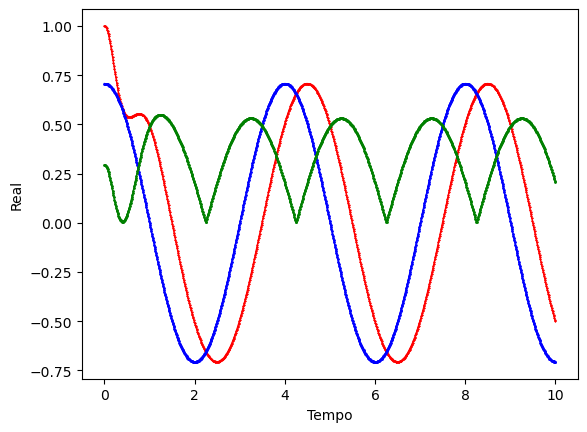

In [4]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100))

r = [ele.real for ele in p]
s = [ele.imag for ele in p]

h = []
for i in range(0, 1000):
    h.append(abs(r[i]-x[i]))

plt.plot(ts, r, color='b', marker='o',  linewidth=1, markersize=1)
plt.plot(ts, h, color='g', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_otimo1.png', format='png')
plt.show()

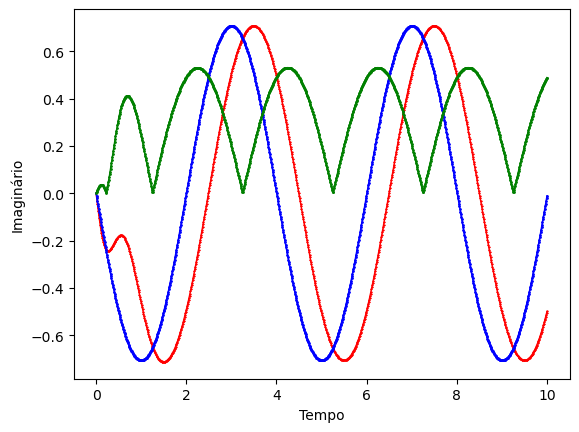

In [5]:
plt.ylabel('Imaginário') 
plt.xlabel('Tempo') 
plt.plot(ts, y, color='r', marker='*', linewidth=1, markersize=1)

m = []
for i in range(0, 1000):
    m.append(abs(s[i]-y[i]))

plt.plot(ts, s, color='b', marker='o',  linewidth=1, markersize=1)
plt.plot(ts, m, color='g', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_otimo2.png', format='png')
plt.show()

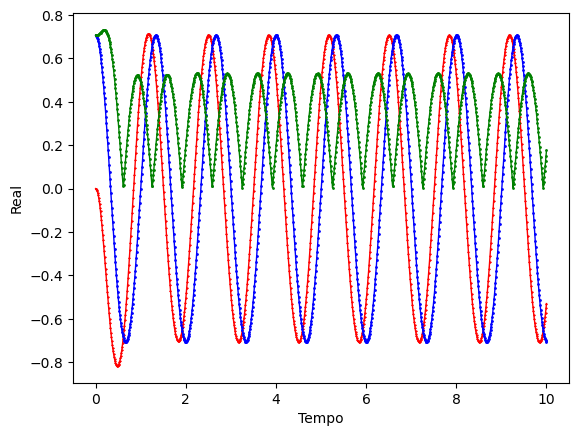

In [6]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-3*complex(0,1)*(1/2*np.pi)*i/100))
    
r = [ele.real for ele in p]
s = [ele.imag for ele in p]
n = []
for i in range(0, 1000):
    n.append(abs(r[i]-x[i]))

plt.plot(ts, r, color='b', marker='o',  linewidth=1, markersize=1)
plt.plot(ts, n, color='g', marker='o',  linewidth=1, markersize=1)
plt.savefig('rk_otimo3.png', format='png')
plt.show()

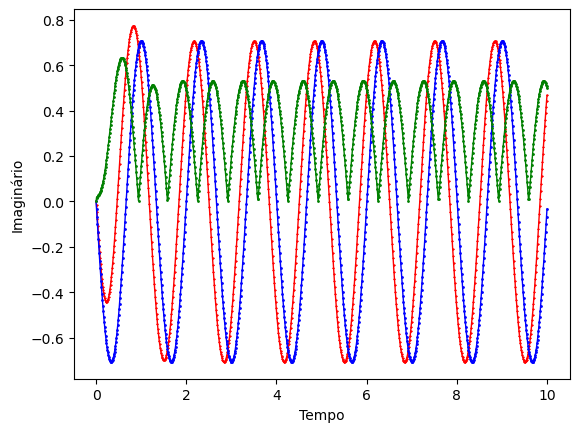

In [7]:
plt.ylabel('Imaginário') 
plt.xlabel('Tempo') 
plt.plot(ts, y, color='r', marker='*', linewidth=1, markersize=1)

o = []
for i in range(0, 1000):
    o.append(abs(s[i]-y[i]))
    
plt.plot(ts, s, color='b', marker='o',  linewidth=1, markersize=1)
plt.plot(ts, o, color='g', marker='o',  linewidth=1, markersize=1)

plt.savefig('rk_otimo4.png', format='png')
plt.show()

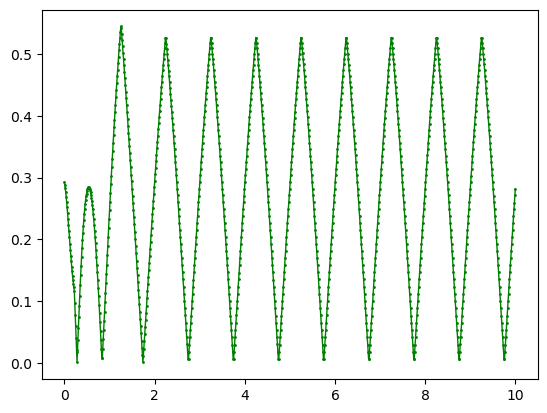

In [10]:
a = []
for i in range(0, 1000):
    a.append(abs(h[i]-m[i]))

plt.plot(ts, a, color='g', marker='o',  linewidth=1, markersize=1)

plt.savefig('rk_otimo5.png', format='png')
plt.show()

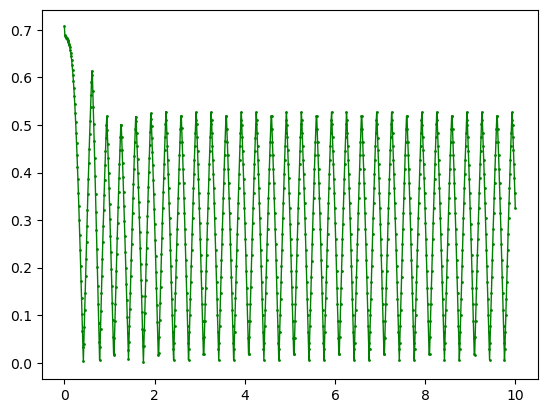

In [11]:
a = []
for i in range(0, 1000):
    a.append(abs(n[i]-o[i]))

plt.plot(ts, a, color='g', marker='o',  linewidth=1, markersize=1)

plt.savefig('rk_otimo6.png', format='png')
plt.show()